**# Project Objective: Predict whether a tumor is malignant or benign**


**To predict the tumor : beneign or malignant cell we use logistic regression and random forest.We will compare both the model to chose the most accurate one. First and foremost we load the dataset with importing library of pandas and os for interacitng with file system. We also import other library with it.We store data in df,then moving on to understanding the data with EDA.**


In [1]:
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df= pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore")

# EDA 
print(df.info())


/kaggle/input/breast-cancer-wisconsin-data/data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569

**we use tools like describe(), head(), info(), isnull()sum(), duplicate(), columns().**

In [2]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [3]:

print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:

print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool


In [6]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


**We then understood that the data in the diagnosis is our target and the last column is null, so we drop it. overall we undestood the dataset.
Further we do encoding of our target columns, for model to intercept it easily. we also plot a grpagh to know the total number of beingn and malignent.**

diagnosis
0    357
1    212
Name: count, dtype: int64


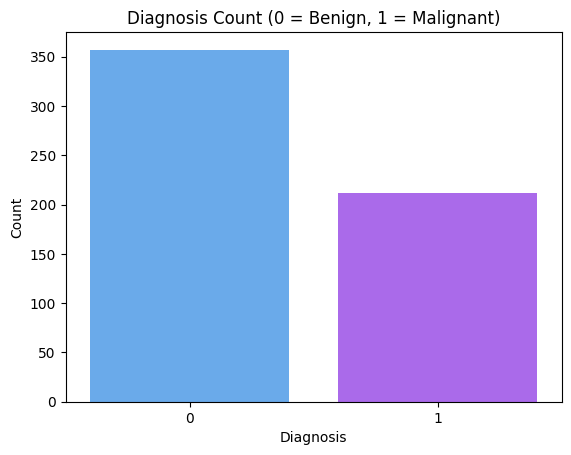

In [7]:
# first lets remove the column which we know are least important like id.
df.drop(columns=["id","Unnamed: 32"], inplace=True) # type: ignore


#Encoding the target columns as it is in onject and while modelling , model dont undestand string or character so we assigns values to it.
import sklearn
#we first do label encoding which turn our string data of M and B into numeric for model to understand as 1 and 0 respectively
from sklearn.preprocessing import LabelEncoder 
df["diagnosis"]= LabelEncoder().fit_transform(df["diagnosis"]) # now M is 1 ans B is 0
print(df["diagnosis"].value_counts())

#importing required library
import seaborn as sns
import matplotlib.pyplot as plt
#plot the graphs of both counts 
sns.countplot(x='diagnosis', data=df, palette='cool')
plt.title("Diagnosis Count (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

**now visually checking out the features of the dataset , which features are majorly correlated, we drop the rest and choose only one out of it. Here i used three visualization grapghs, heatmap to find correlations, violin plot.**

Heatmap:

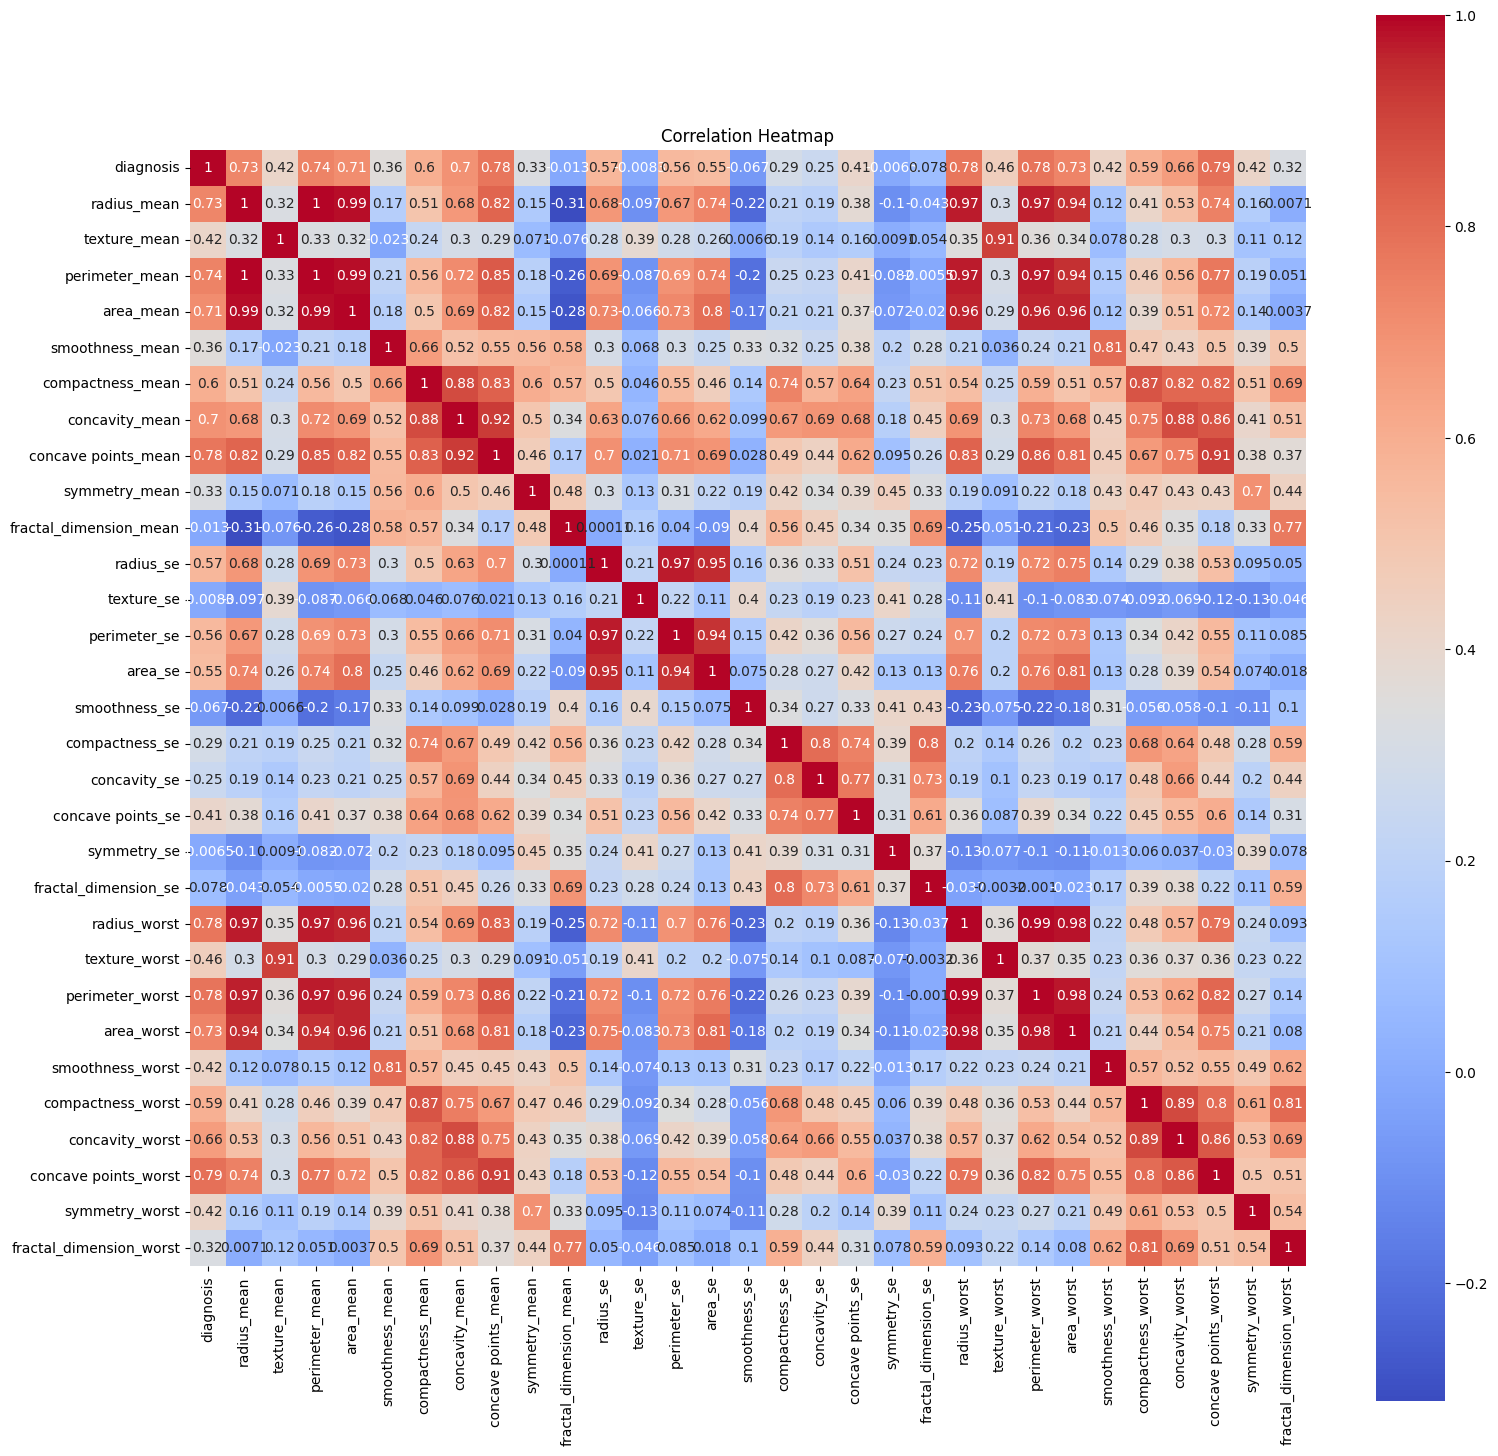

In [8]:
#use heatmap to find correlation in our data specially cancer
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', square=True) # type: ignore
plt.title("Correlation Heatmap")
plt.show()

*we see the correlation between all the columns against the diagnosis, and features like radius_mean, perimeter_mean, area_mean, concavity_mean, concave point_mean, radius_worst, perimeter_worst , area_worst concave point_worst can be seen highly correlated, these features are good for model training. but as some features are also highly correlated with each other. other features like concavity_se show least correlation*

Violin plot: i have plotted for seperately for mean, standard and worst cases

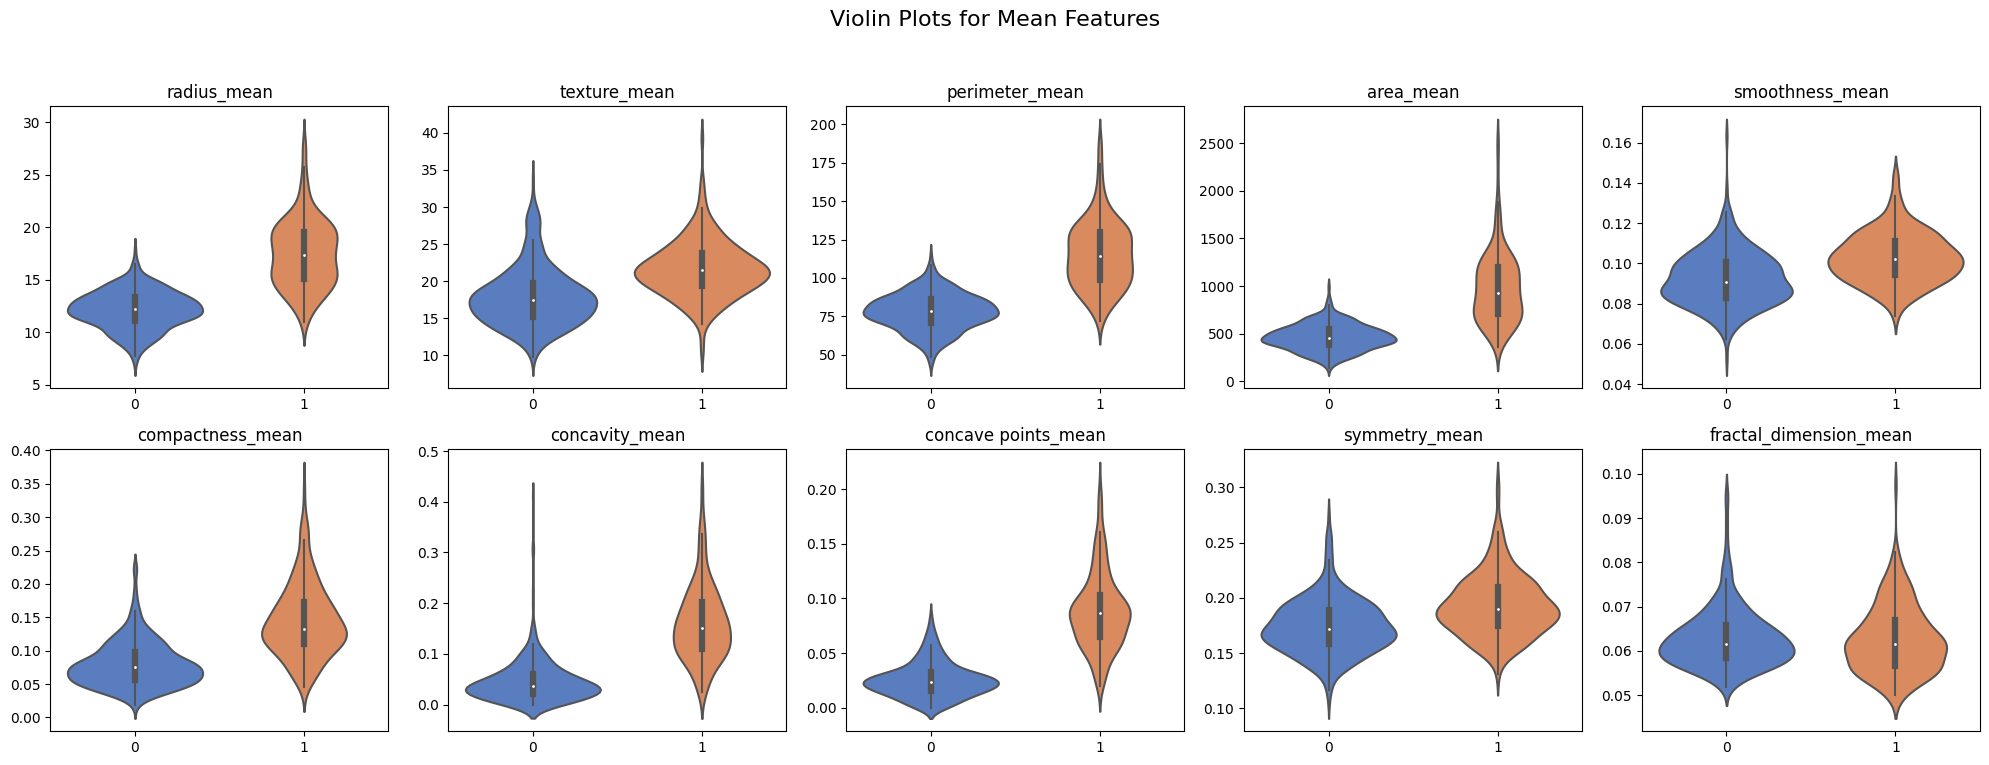

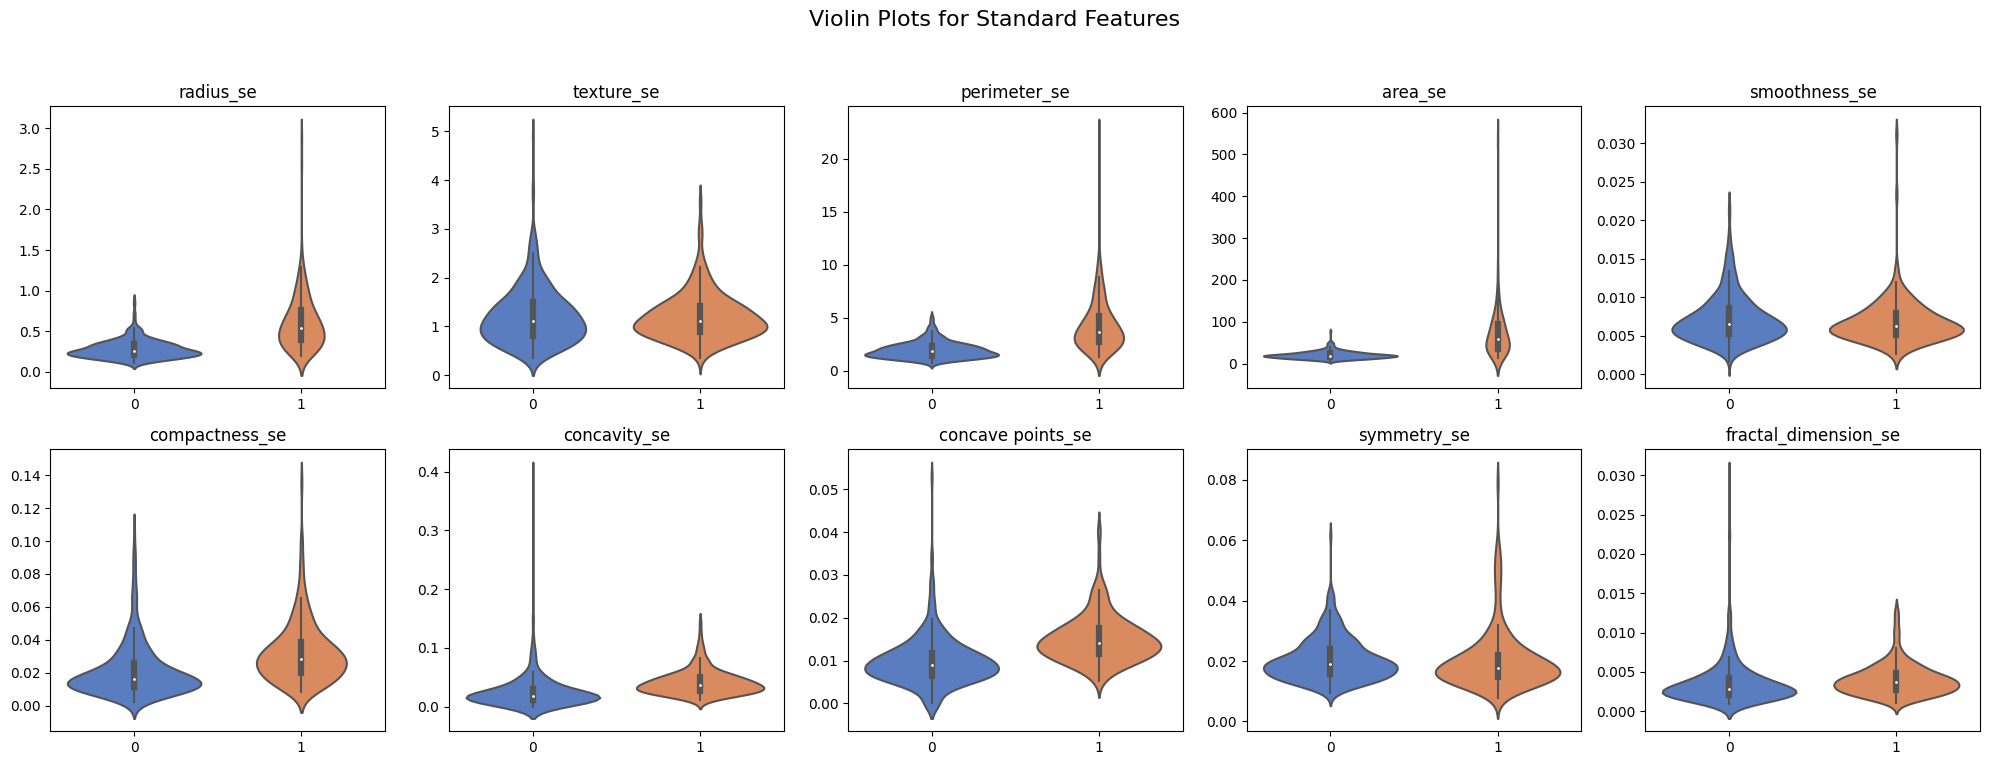

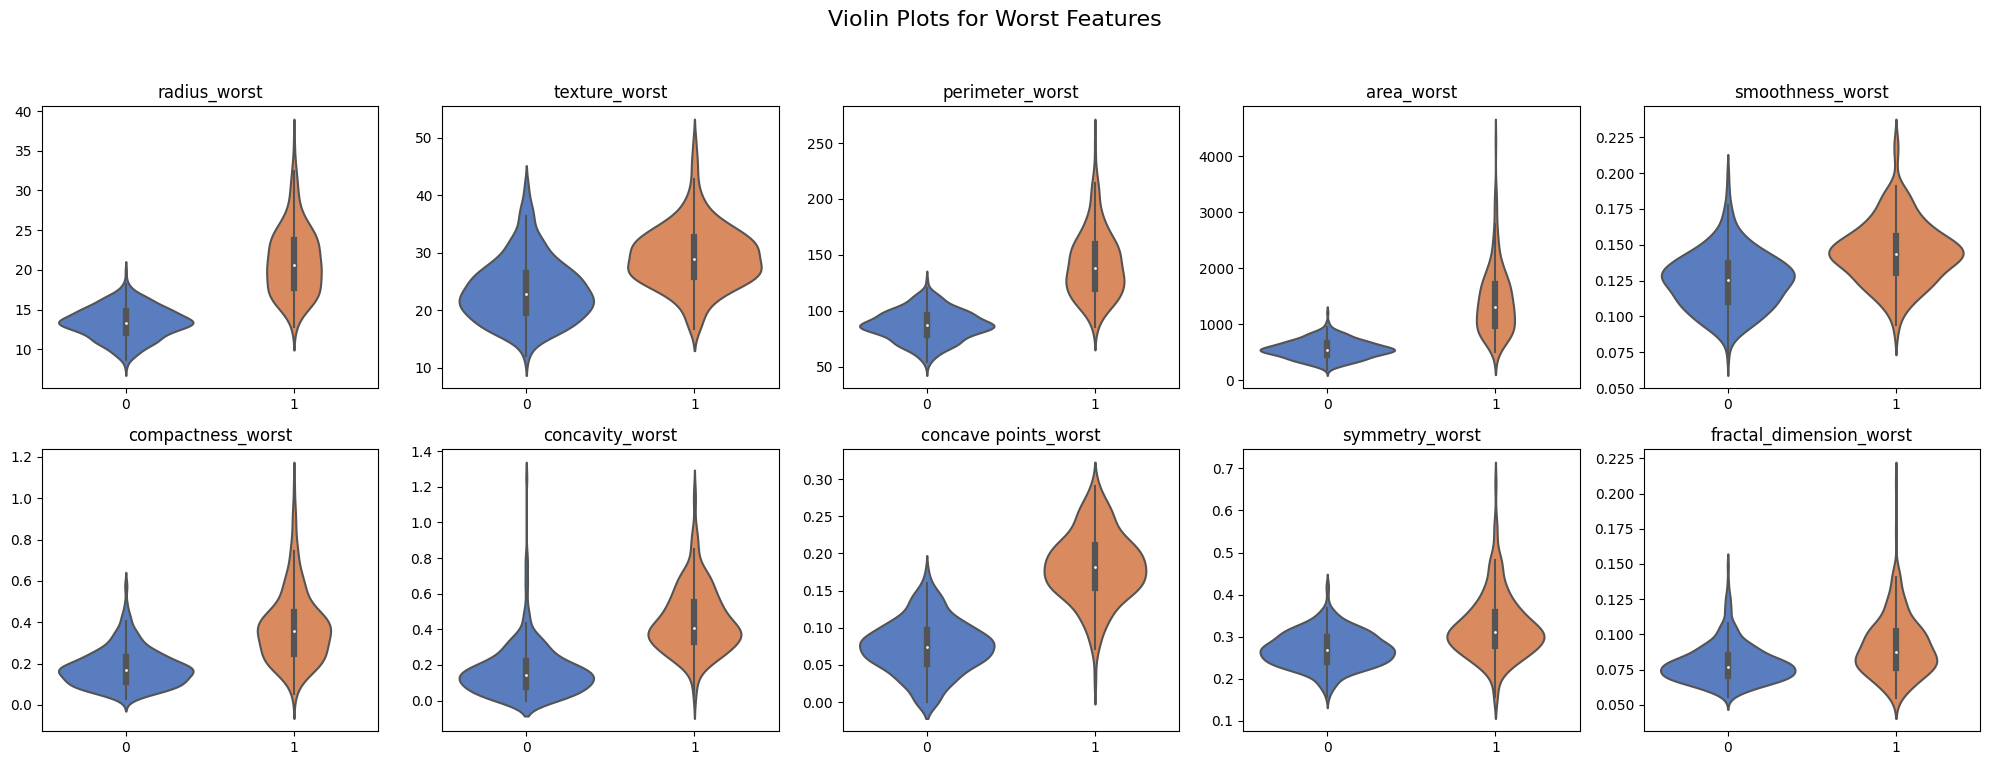

In [9]:
# lets plot sepearte data wise for mean, standard  and worst
dfM = df[df['diagnosis'] == 1]  # Malignant
dfB = df[df['diagnosis'] == 0]  # Benign

features_mean = list(df.columns[1:11])  # First 10 features (mean)
features_std = list(df.columns[11:21])  # Next 10 features (standard deviation)
features_worst = list(df.columns[21:31])  # Last 10 features (worst)

# Create a grid layout: 2 rows × 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.suptitle('Violin Plots for Mean Features', fontsize=16)
# Flatten axes array for easy indexing
axes = axes.flatten()
# Plot each feature in a subplot
for i, feature in enumerate(features_mean):
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='muted', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#standard plot
# Create a grid layout: 2 rows × 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.suptitle('Violin Plots for Standard Features', fontsize=16)
# Flatten axes array for easy indexing
axes = axes.flatten()
# Plot each feature in a subplot
for i, feature in enumerate(features_std):
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='muted', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



#worst plot
# Create a grid layout: 2 rows × 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.suptitle('Violin Plots for Worst Features', fontsize=16)
# Flatten axes array for easy indexing
axes = axes.flatten()
# Plot each feature in a subplot
for i, feature in enumerate(features_worst):
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='muted', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

*we have visualise the feature of distribution of benign and malignant across each feature we found out that thehigher sepreation was in radius_mean, perimeter_mean, area_mean concavity_mean, concave point_mean, radius_worst, concave point_worst. While other things like symetry_se shows highly similar distribution which we wont take*

**we remove the features we found to be highly correlated, we use correlation matrix, and drop the column highly correlated(>0.9).**


In [10]:
import numpy as np
# Remove highly correlated features
corr_matrix = df.drop("diagnosis", axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Dropping:", to_drop)
df_filtered = df.drop(columns=to_drop)


Dropping: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


*Now our feature looks much cleaner after both visulaozation and correlated matrix.*

**after removing highly correlated feature to select best top feature we do feature selection using SelectKBest method to get the best 10 features also with f-test**


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif


X = df_filtered.drop("diagnosis", axis=1)
y = LabelEncoder().fit_transform(df_filtered["diagnosis"])

skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(X, y)

selected_kbest = X.columns[skb.get_support()]
print("Top features from SelectKBest:\n", selected_kbest)


Top features from SelectKBest:
 Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'radius_se', 'concave points_se', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


**optimise futher feature selection using RFECV wiht logistic regression, we used the frecv with logistic regression as it removes the least important features one by one for traning the model only on the best features**

Optimal number of features: 19
Selected features (RFECV): ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


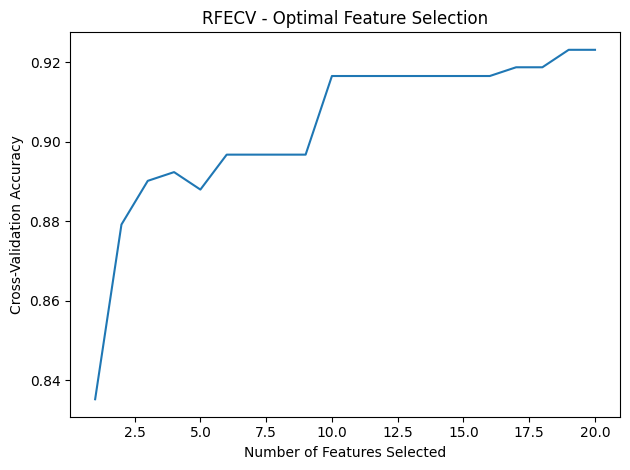

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split


# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define model and RFECV
lr_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfecv = RFECV(estimator=lr_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)

# Results
print("Optimal number of features:", rfecv.n_features_)
print("Selected features (RFECV):", X.columns[rfecv.support_].tolist())

# Plot performance using cv_results_['mean_test_score']
plt.figure()
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Accuracy")
plt.title("RFECV - Optimal Feature Selection")
plt.tight_layout()
plt.show()


*it suggested 19 best feature for model selection, we will train the model with RFECV with 19 features*

**Tree-Based Feature with Random Forest, i used random forest to give me top10 important features, further the top10 features were visulalised based on its importance. I used Random forest with RFECV for the comparision between two model to select the best one out of both.**

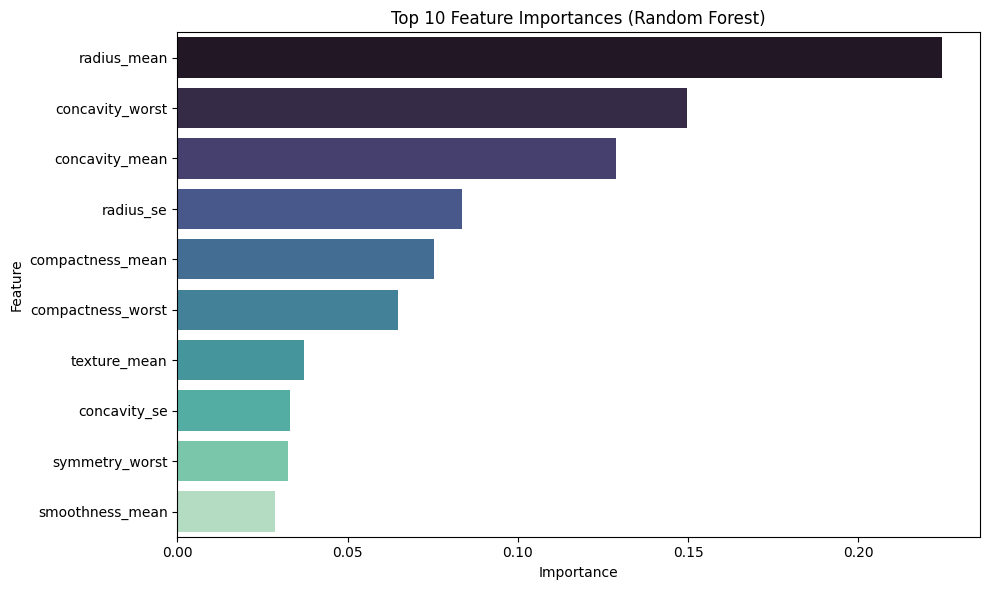

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(x_train, y_train)

importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for top 10 features
rf_feat_imp = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
}).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feat_imp, palette='mako')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


*Here for Random Forest we selected 10 best feature and now will train the model for both of RFECV and Random forest*

**Model Training based on RFECV using logistic regression. RFECV uses Logistic Regression as the base estimator and recursively eliminates less important features based on cross-validated performance.**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = df_filtered.drop("diagnosis", axis=1)
y = LabelEncoder().fit_transform(df_filtered["diagnosis"])
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply RFECV using Logistic Regression
lr_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfecv = RFECV(estimator=lr_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)

# Train final Logistic Regression model on selected features
final_features_rfecv = X.columns[rfecv.support_]
x_train_rfecv = x_train[final_features_rfecv]
x_test_rfecv = x_test[final_features_rfecv]

final_lr_model = LogisticRegression(max_iter=10000, solver='liblinear')
final_lr_model.fit(x_train_rfecv, y_train)
pred_lr_rfecv = final_lr_model.predict(x_test_rfecv)

# Evaluation
print("Model: Logistic Regression (RFECV Features)")
print("Accuracy:", accuracy_score(y_test, pred_lr_rfecv))
print(classification_report(y_test, pred_lr_rfecv))


Model: Logistic Regression (RFECV Features)
Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



**Model Training with Random Forest classifer and used the model’s feature importances to select the top 10 most important features**

In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Train Random Forest on full data
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(x_train, y_train)

# Get feature importances
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_10_features = X.columns[indices[:10]]
x_train_top10 = x_train[top_10_features]
x_test_top10 = x_test[top_10_features]

# Train Random Forest on top 10 features
model_top10_rf = RandomForestClassifier(random_state=42)
model_top10_rf.fit(x_train_top10, y_train)
pred_rf_top10 = model_top10_rf.predict(x_test_top10)

# Evaluation
print("Model: Random Forest (Top 10 Important Features)")
print("Accuracy:", accuracy_score(y_test, pred_rf_top10))
print(classification_report(y_test, pred_rf_top10))


Model: Random Forest (Top 10 Important Features)
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Comparing both the model the Random forest gave us better accuracy also identify the malignant with better accuracy than RFECV**

**#conclusions 
In this project we analyse the breast cancer cell using two predictive model: 
we perform basic EDA
analyse correlate features
applied visulasation grapghs to visulally see correlated features
applied feature selction techniques- SelectKBest, RFECV with logistic regression, Random Forest feature
Trained model on two models- Logistic Regression and Random Forest Classifier with top 10 features**



**Finally we saw the Random Forest model had more accuracy- 94.7%**